<a href="https://colab.research.google.com/github/PolyGon-13/DataScience_Study/blob/main/_projects/health_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 건강검진 데이터 분석
-  https://www.data.go.kr/dataset/15007122/fileData.do

# 초기 설정 및 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [2]:
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

# 데이터 불러오기 및 기본정보 탐색

In [15]:
df=pd.read_csv('./data/NHIS_OPEN_GJ_2017.CSV',encoding="cp949")
df.shape

(1000000, 34)

In [16]:
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,25.0,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,10.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,136.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,30.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,68.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     999738 non-null   float64
 6   체중(5Kg 단위)    999732 non-null   float64
 7   허리둘레          999560 non-null   float64
 8   시력(좌)         999712 non-null   float64
 9   시력(우)         999721 non-null   float64
 10  청력(좌)         999758 non-null   float64
 11  청력(우)         999757 non-null   float64
 12  수축기혈압         999924 non-null   float64
 13  이완기혈압         999923 non-null   float64
 14  식전혈당(공복혈당)    999957 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999957 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [18]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

In [19]:
df.dtypes

,0
기준년도,int64
가입자일련번호,int64
성별코드,int64
연령대코드(5세단위),int64
시도코드,int64
신장(5Cm단위),float64
체중(5Kg 단위),float64
허리둘레,float64
시력(좌),float64
시력(우),float64


In [20]:
df.isnull().sum() # df.isna().sum()와 동일

,0
기준년도,0
가입자일련번호,0
성별코드,0
연령대코드(5세단위),0
시도코드,0
신장(5Cm단위),262
체중(5Kg 단위),268
허리둘레,440
시력(좌),288
시력(우),279


<Axes: >

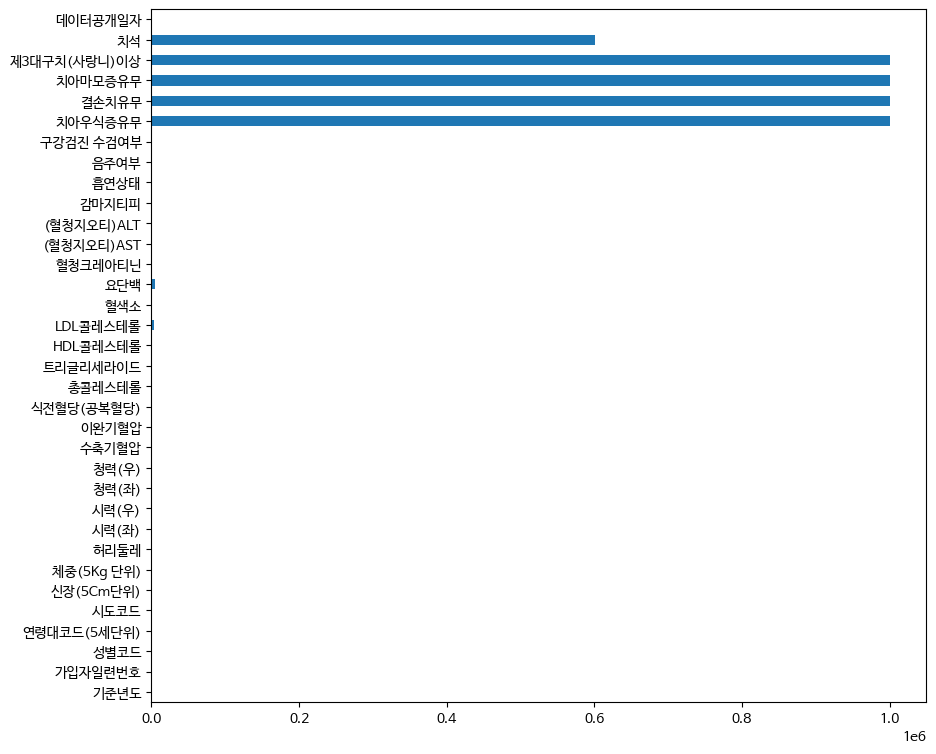

In [21]:
df.isnull().sum().plot.barh(figsize=(10,9))

# 일부 데이터 요약하기

In [22]:
df[['(혈청지오티)ALT','(혈청지오티)AST']].head()

,(혈청지오티)ALT,(혈청지오티)AST
0,41.0,19.0
1,13.0,16.0
2,62.0,45.0
3,24.0,21.0
4,62.0,37.0


In [23]:
df[['(혈청지오티)ALT','(혈청지오티)AST']].describe()

,(혈청지오티)ALT,(혈청지오티)AST
count,999956.000000,999958.000000
mean,25.859343,26.075068
std,25.814268,24.437136
min,1.000000,1.000000
25%,15.000000,19.000000
50%,20.000000,23.000000
75%,30.000000,28.000000
max,6710.000000,9999.000000


# 값 집계

In [24]:
df['성별코드'].value_counts()

,count
성별코드,
1,531172
2,468828


In [25]:
df['흡연상태'].value_counts()

,count
흡연상태,
1.0,608587
3.0,215061
2.0,176192


# groupby & pivot_table

In [28]:
df.groupby(['성별코드'])['가입자일련번호'].count()

,가입자일련번호
성별코드,
1,531172
2,468828


In [29]:
df.groupby(['성별코드','음주여부'])['가입자일련번호'].count()

성별코드  음주여부
1     0.0     175150
      1.0     355826
2     0.0     327579
      1.0     140920
Name: 가입자일련번호, dtype: int64

In [30]:
df.groupby(['성별코드','음주여부'])['감마지티피'].agg(['count','mean','median'])

count       mean  median
성별코드 음주여부                           
1    0.0   175139  34.710544    25.0
     1.0   355819  56.707919    37.0
2    0.0   327559  22.660238    17.0
     1.0   140913  25.115149    17.0

In [31]:
df.pivot_table(index='음주여부',values='가입자일련번호',aggfunc='count')

,가입자일련번호
음주여부,
0.0,502729
1.0,496746


In [32]:
pd.pivot_table(df,index=['성별코드','음주여부'],values='감마지티피',aggfunc='describe')

25%   50%   75%     count    max       mean  min        std
성별코드 음주여부                                                              
1    0.0   18.0  25.0  38.0  175139.0  999.0  34.710544  1.0  37.715218
     1.0   24.0  37.0  63.0  355819.0  999.0  56.707919  1.0  69.039084
2    0.0   13.0  17.0  24.0  327559.0  999.0  22.660238  1.0  25.181300
     1.0   13.0  17.0  25.0  140913.0  999.0  25.115149  1.0  35.870812

# 데이터 시각화

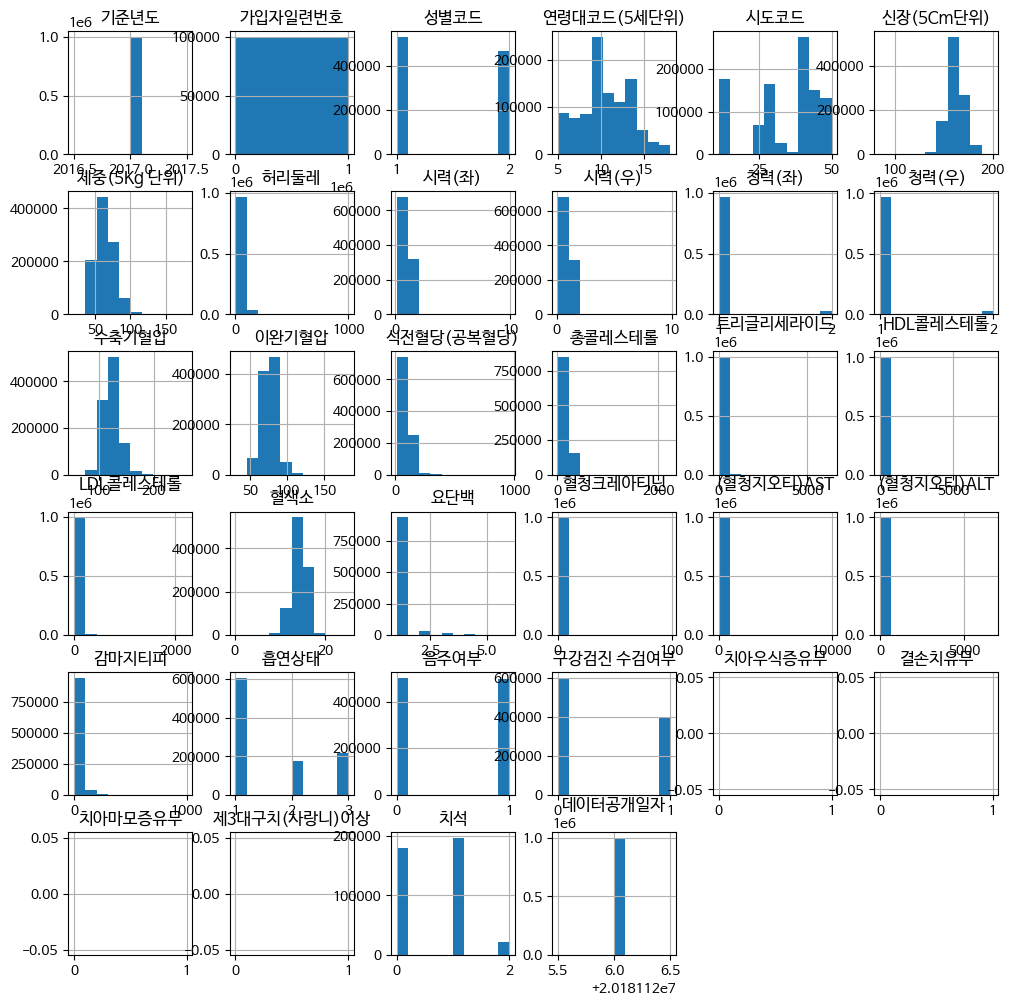

In [33]:
h=df.hist(figsize=(12,12))

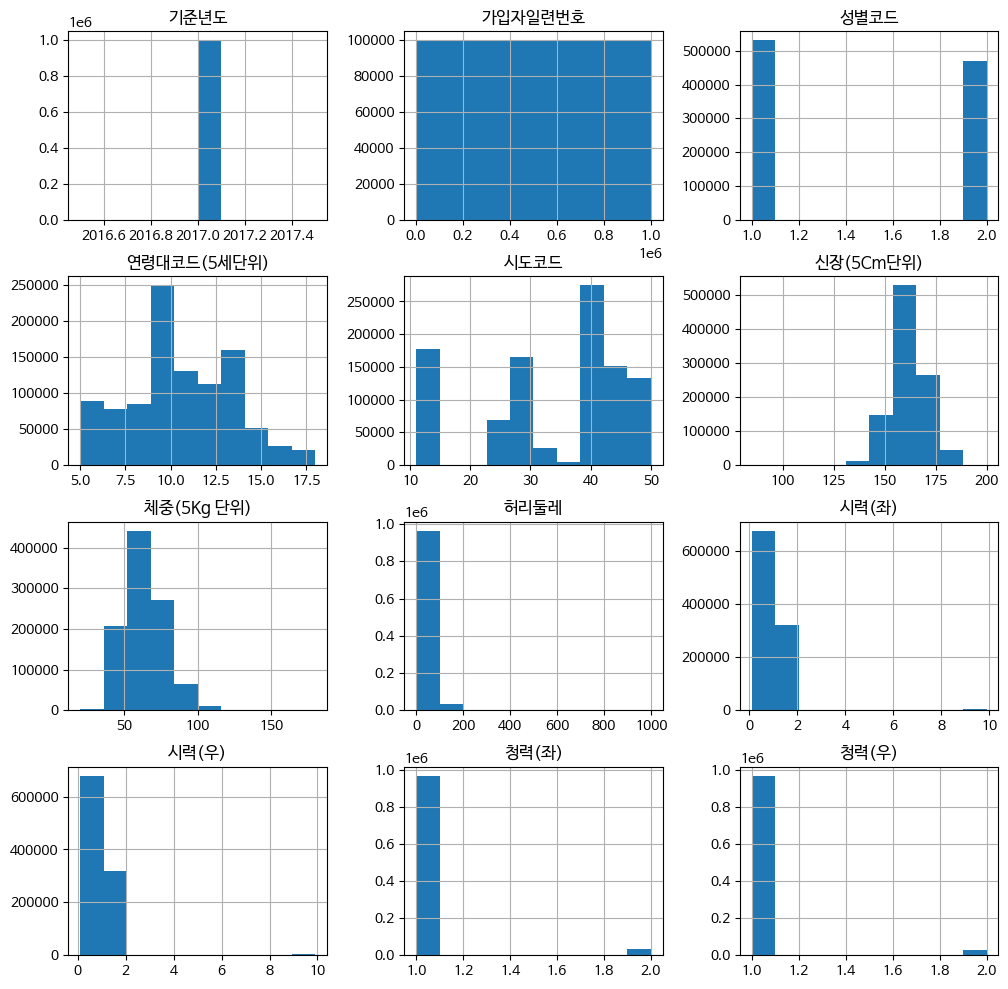

In [34]:
h=df.iloc[:,:12].hist(figsize=(12,12))

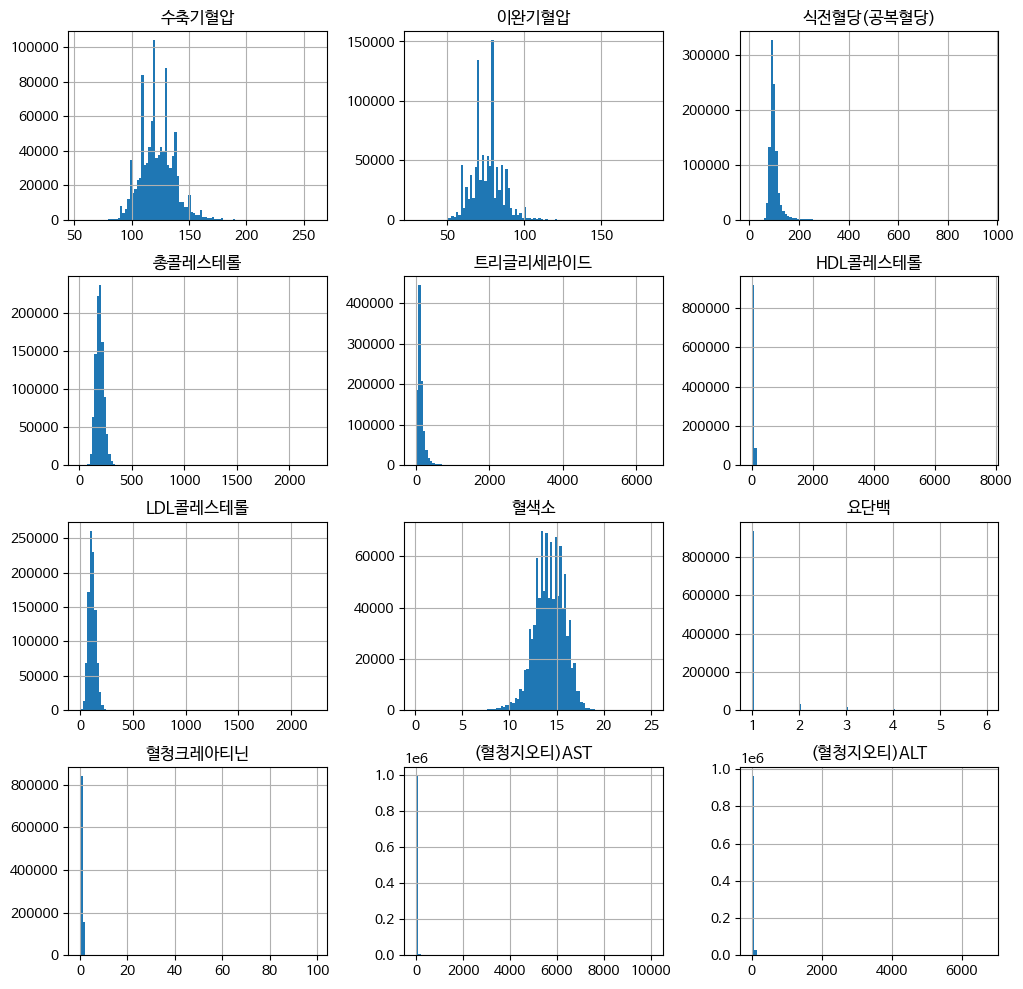

In [35]:
h=df.iloc[:,12:24].hist(figsize=(12,12),bins=100)

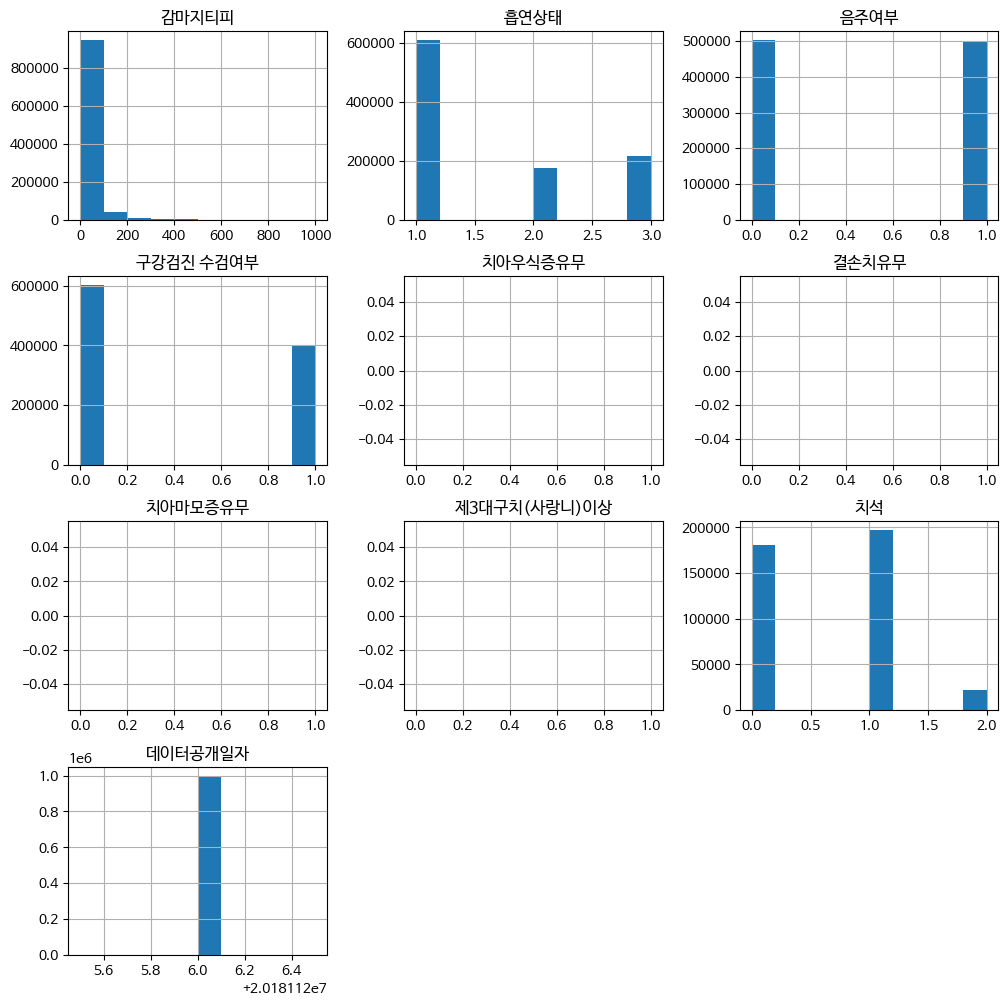

In [36]:
h=df.iloc[:,24:].hist(figsize=(12,12),bins=10)

# 샘플데이터 추출

In [38]:
df_sample=df.sample(1000,random_state=1)
df_sample.shape

(1000, 34)

# 범주형(카테고리) 데이터 시각화

<Axes: xlabel='음주여부'>

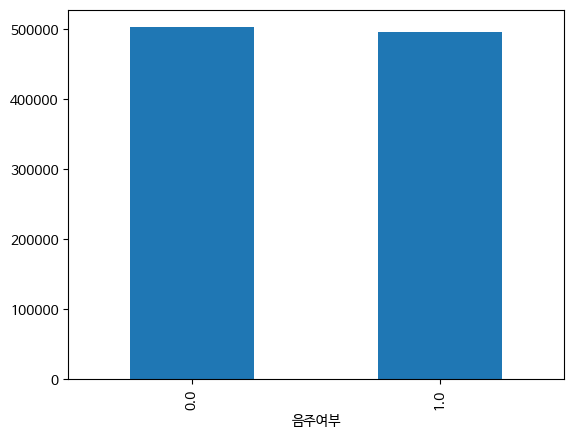

In [65]:
df['음주여부'].value_counts().plot.bar()

<Axes: xlabel='음주여부', ylabel='count'>

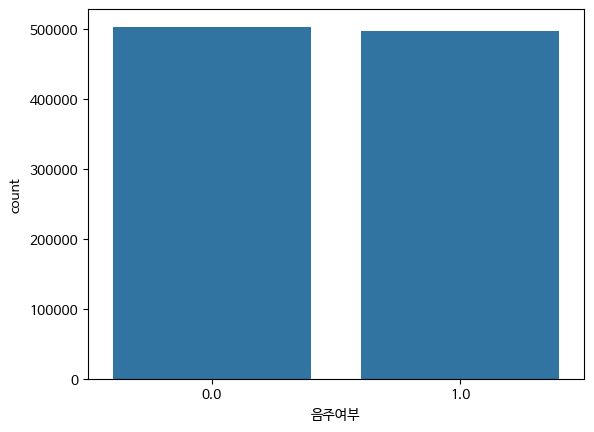

In [66]:
sns.countplot(x='음주여부',data=df)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='음주여부', ylabel='count'>

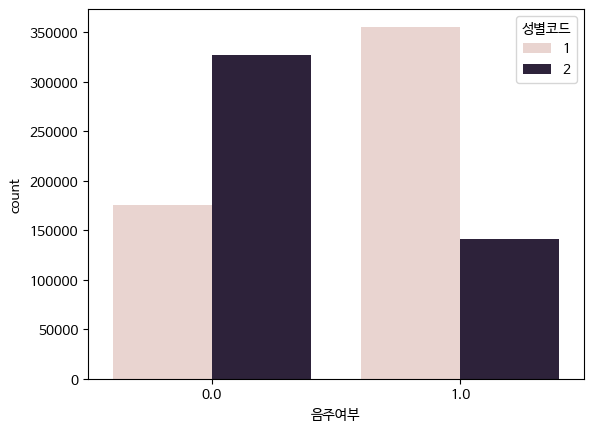

In [67]:
sns.countplot(data=df,x='음주여부',hue='성별코드')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='연령대코드(5세단위)', ylabel='count'>

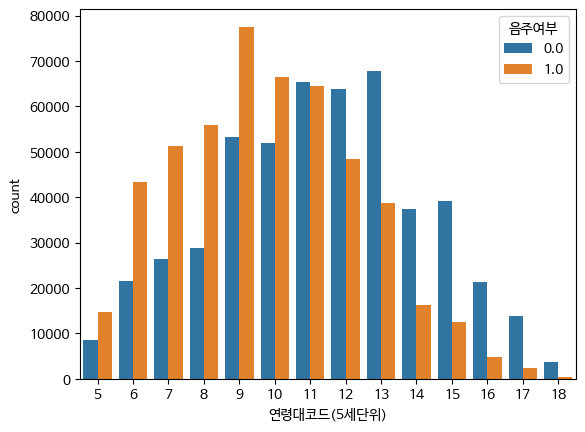

In [68]:
sns.countplot(data=df,x='연령대코드(5세단위)',hue='음주여부')

<Axes: xlabel='신장(5Cm단위)', ylabel='count'>

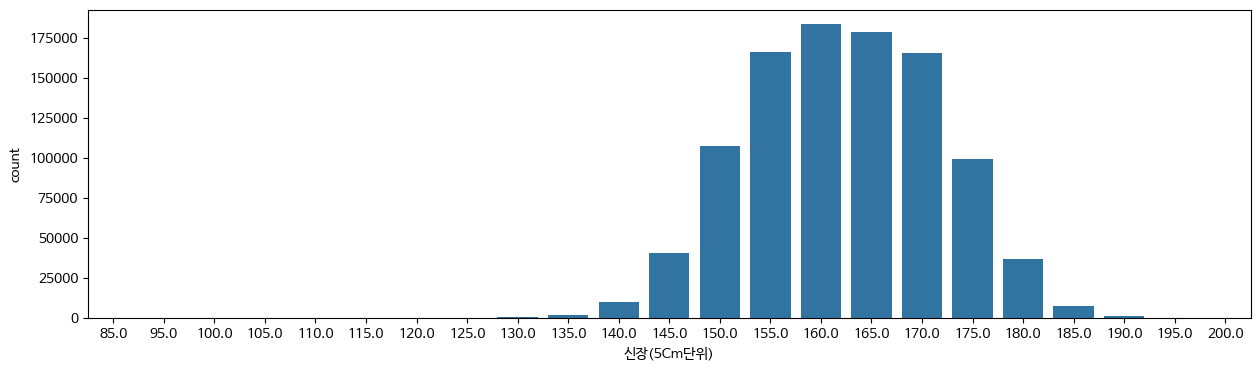

In [69]:
plt.figure(figsize=(15,4))
sns.countplot(data=df,x='신장(5Cm단위)')

<Axes: xlabel='체중(5Kg 단위)', ylabel='count'>

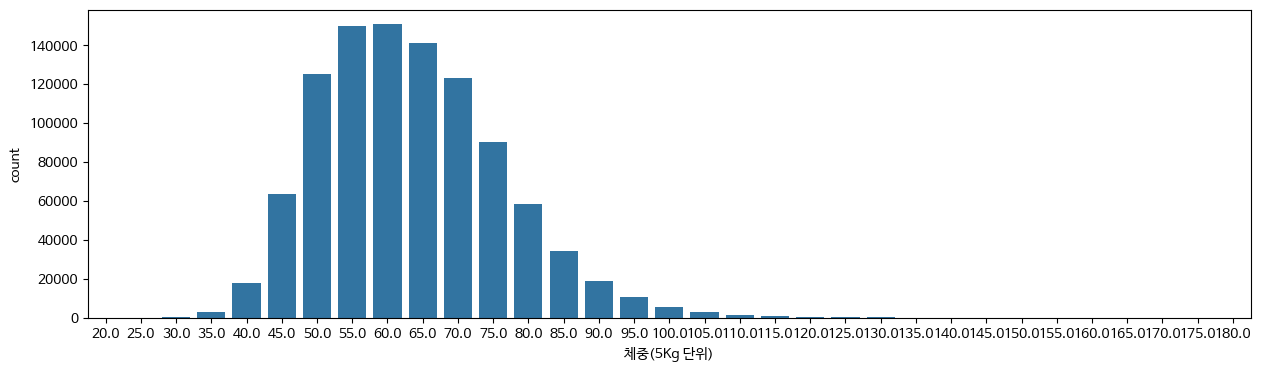

In [70]:
plt.figure(figsize=(15,4))
sns.countplot(data=df,x='체중(5Kg 단위)')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='신장(5Cm단위)', ylabel='count'>

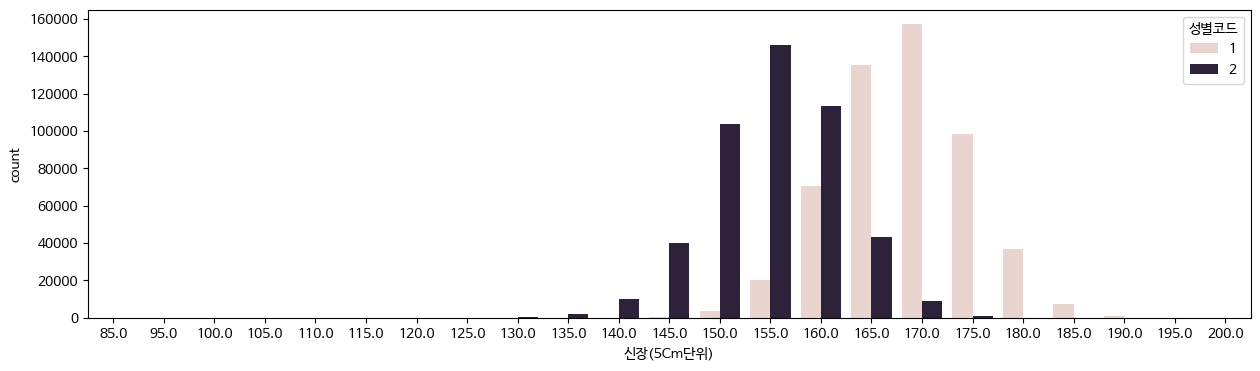

In [71]:
plt.figure(figsize=(15,4))
sns.countplot(data=df,x='신장(5Cm단위)',hue='성별코드')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

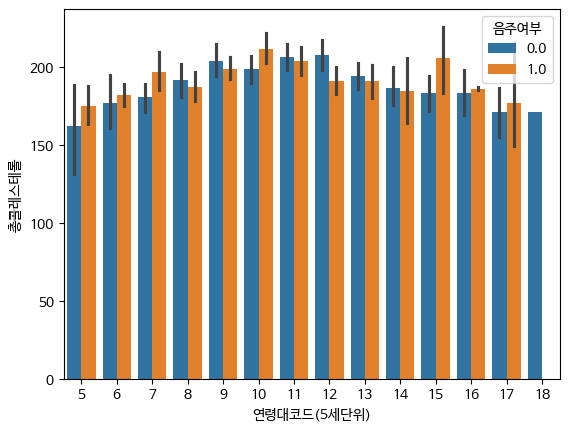

In [72]:
sns.barplot(data=df_sample,x='연령대코드(5세단위)',y='총콜레스테롤',hue='음주여부')

<ipython-input-73-1bfd0bdf9ce1>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df,x='연령대코드(5세단위)',y='트리글리세라이드',hue='음주여부',ci=None)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='연령대코드(5세단위)', ylabel='트리글리세라이드'>

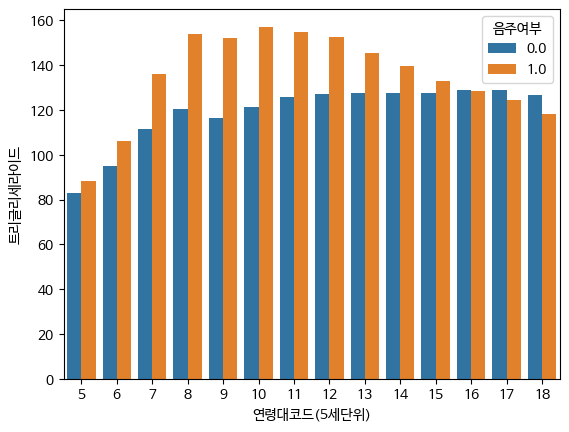

In [73]:
sns.barplot(data=df,x='연령대코드(5세단위)',y='트리글리세라이드',hue='음주여부',ci=None)

<ipython-input-74-24f04b91085f>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=df_sample,x='연령대코드(5세단위)',y='체중(5Kg 단위)',hue='성별코드',ci='sd')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='연령대코드(5세단위)', ylabel='체중(5Kg 단위)'>

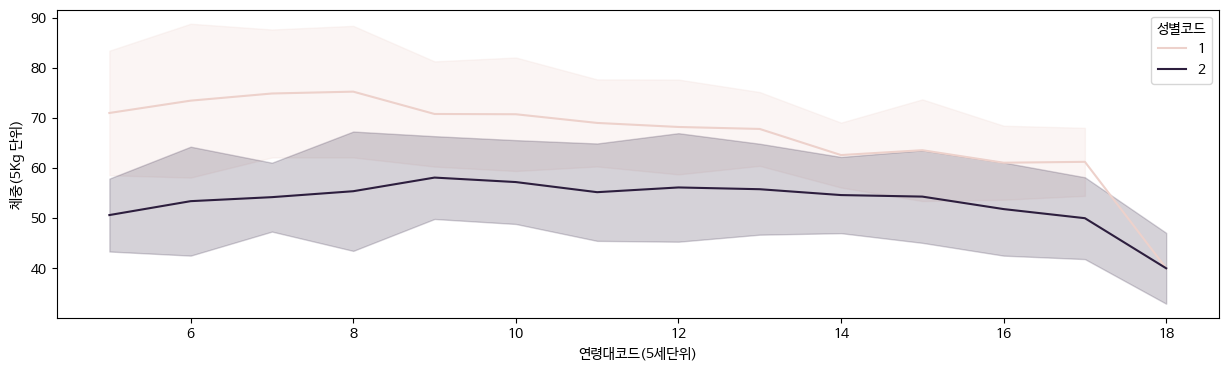

In [74]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_sample,x='연령대코드(5세단위)',y='체중(5Kg 단위)',hue='성별코드',ci='sd')

<ipython-input-75-d1c9bbda8b2f>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df_sample,x='연령대코드(5세단위)',y='신장(5Cm단위)',hue='음주여부',ci='sd')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
<ipython-input-75-d1c9bbda8b2f>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df_sample,x='연령대코드(5세단위)',y='신장(

<Axes: xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

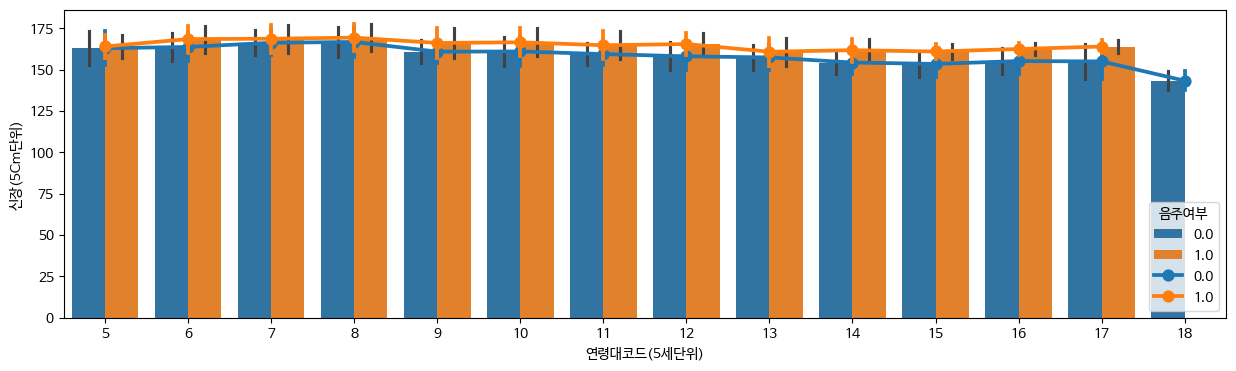

In [75]:
plt.figure(figsize=(15,4))
sns.barplot(data=df_sample,x='연령대코드(5세단위)',y='신장(5Cm단위)',hue='음주여부',ci='sd')
sns.pointplot(data=df_sample,x='연령대코드(5세단위)',y='신장(5Cm단위)',hue='음주여부',ci='sd')

<ipython-input-76-48673383ed3b>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df_sample,x='연령대코드(5세단위)',y='신장(5Cm단위)',hue='성별코드',ci='sd')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

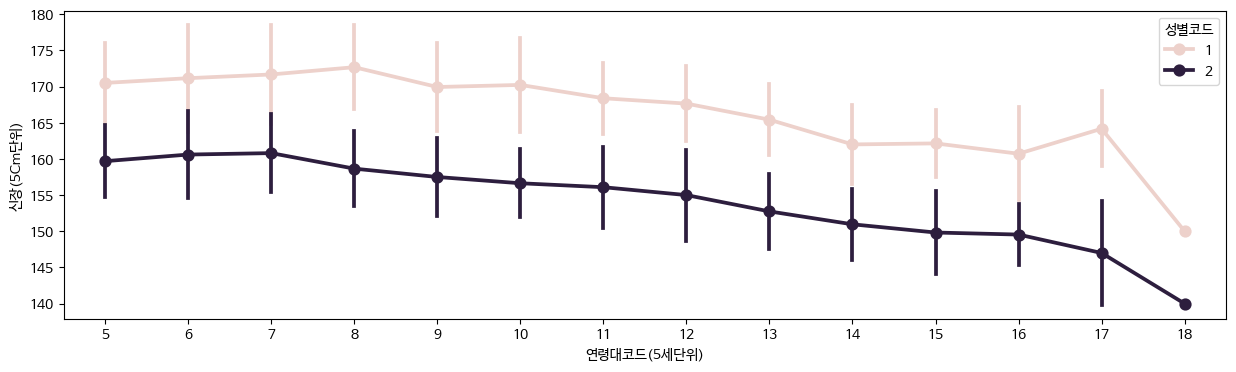

In [76]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df_sample,x='연령대코드(5세단위)',y='신장(5Cm단위)',hue='성별코드',ci='sd')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

<Axes: xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

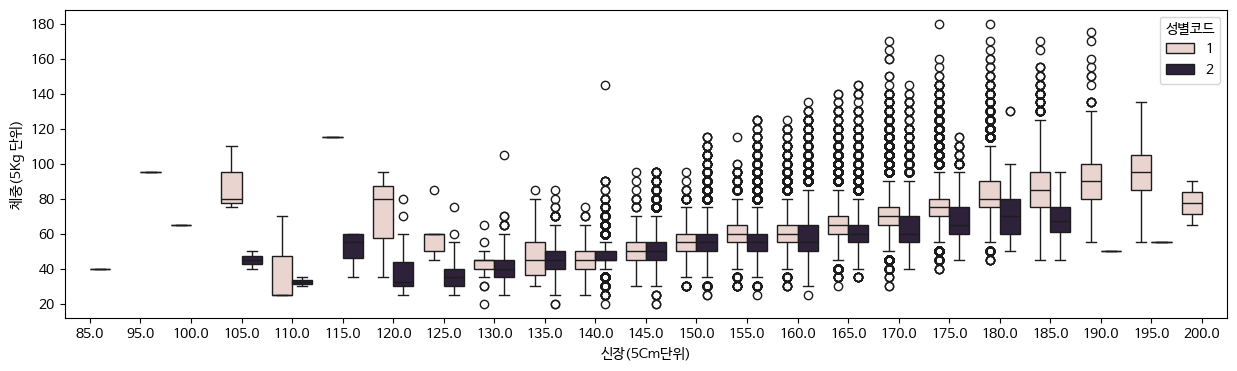

In [77]:
plt.figure(figsize=(15,4))
sns.boxplot(data=df,x='신장(5Cm단위)',y='체중(5Kg 단위)',hue='성별코드')

<Axes: xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

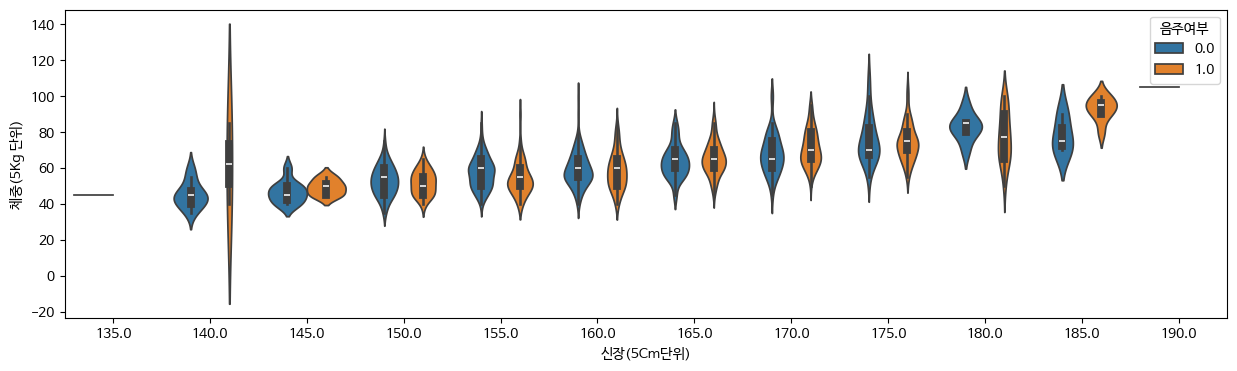

In [78]:
plt.figure(figsize=(15,4))
sns.violinplot(data=df_sample,x='신장(5Cm단위)',y='체중(5Kg 단위)',hue='음주여부')

<Axes: xlabel='신장(5Cm단위)', ylabel='혈색소'>

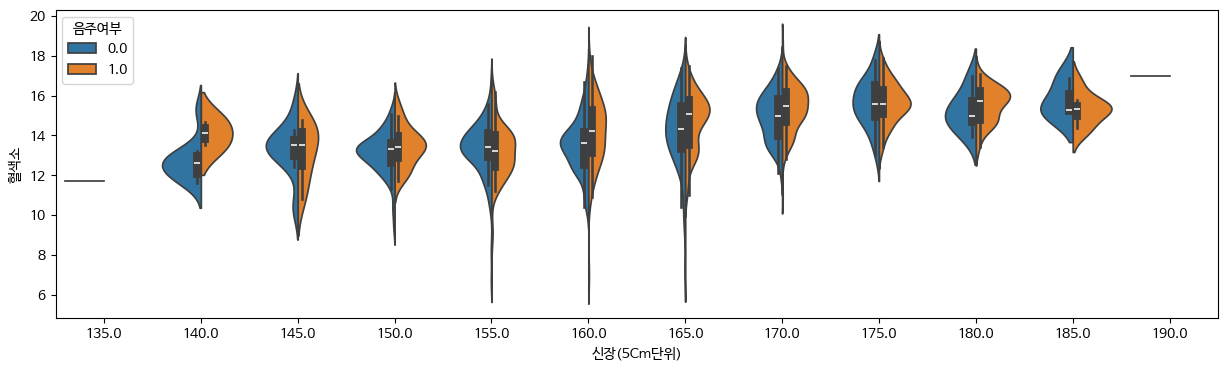

In [79]:
plt.figure(figsize=(15,4))
sns.violinplot(data=df_sample,x='신장(5Cm단위)',y='혈색소',hue='음주여부',split=True)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 37.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 52.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 51.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-

<Axes: xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

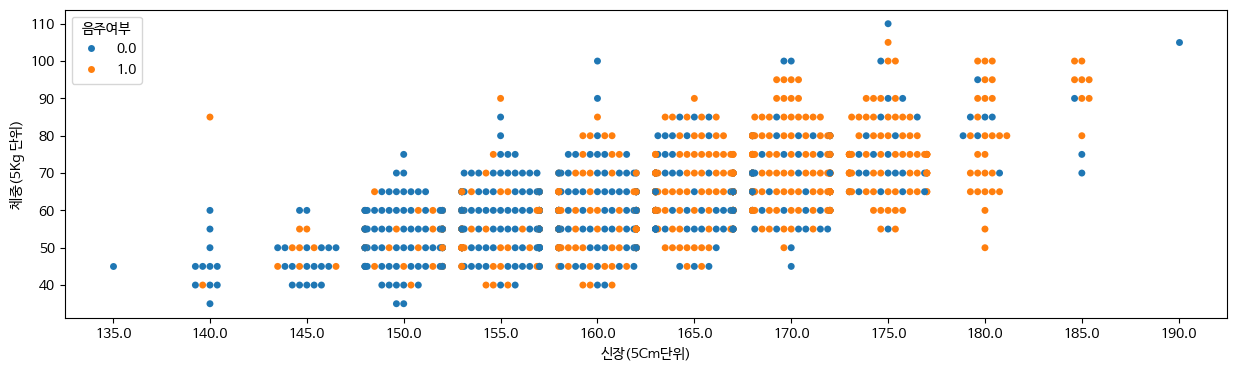

In [80]:
plt.figure(figsize=(15,4))
sns.swarmplot(data=df_sample,x='신장(5Cm단위)',y='체중(5Kg 단위)',hue='음주여부')

# 수치형 데이터 시각화

<Axes: xlabel='(혈청지오티)AST', ylabel='(혈청지오티)ALT'>

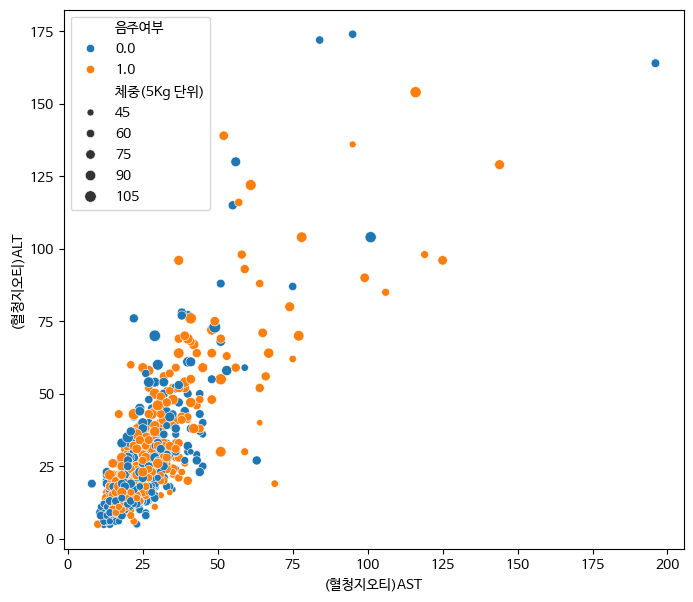

In [64]:
plt.figure(figsize=(8,7))
sns.scatterplot(data=df_sample,x='(혈청지오티)AST',y='(혈청지오티)ALT',hue='음주여부',
                size='체중(5Kg 단위)')

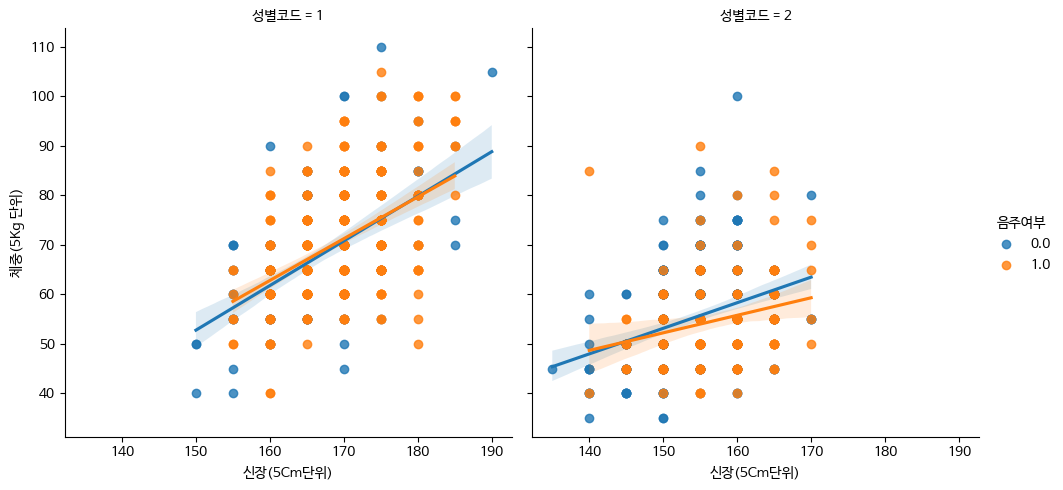

In [82]:
sns.lmplot(data=df_sample,x='신장(5Cm단위)',y='체중(5Kg 단위)',hue='음주여부',col='성별코드')

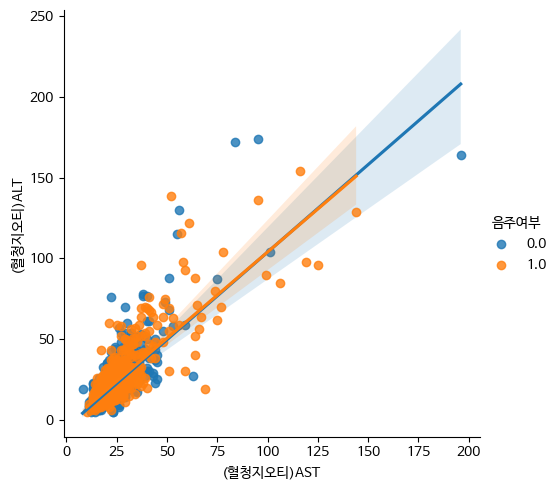

In [83]:
sns.lmplot(data=df_sample,x='(혈청지오티)AST',y='(혈청지오티)ALT',hue='음주여부',robust=True)

# 이상치 다루기

In [84]:
df_ASLT=df_sample[(df_sample['(혈청지오티)AST']<400) & (df_sample['(혈청지오티)ALT']<400)]

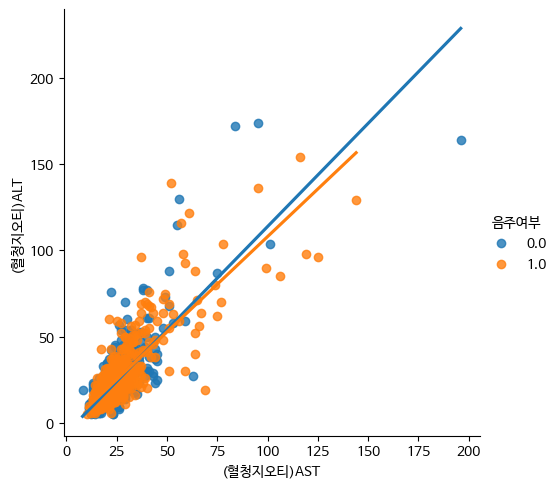

In [85]:
sns.lmplot(data=df_ASLT,x='(혈청지오티)AST',y='(혈청지오티)ALT',hue='음주여부',ci=None)

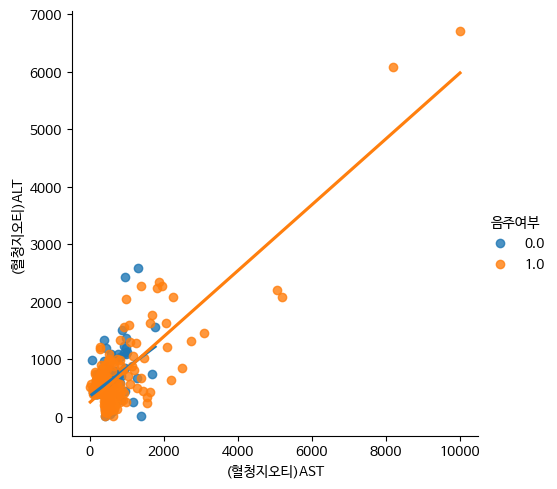

In [86]:
df_ASLT_high=df[(df['(혈청지오티)AST']>400) | (df['(혈청지오티)ALT']>400)]
sns.lmplot(data=df_ASLT_high,x='(혈청지오티)AST',y='(혈청지오티)ALT',hue='음주여부',ci=None)

In [87]:
df_ASLT_high_8000=df_ASLT_high[df_ASLT_high['(혈청지오티)AST']>8000]
df_ASLT_high_8000.iloc[:,10:27]

,청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부
677177,2.0,2.0,100.0,60.0,107.0,129.0,152.0,30.0,69.0,13.0,1.0,1.2,8200.0,6080.0,888.0,1.0,1.0
887237,1.0,1.0,97.0,71.0,86.0,158.0,111.0,100.0,35.0,17.8,3.0,0.8,9999.0,6710.0,379.0,3.0,1.0


# displot

In [88]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

In [89]:
df_chol=df.loc[df['총콜레스테롤'].notnull(),'총콜레스테롤']
df_chol.head()

,총콜레스테롤
0,178.0
1,255.0
2,211.0
3,160.0
4,253.0


In [90]:
df_chol.describe()

,총콜레스테롤
count,999957.000000
mean,195.515105
std,38.937646
min,10.000000
25%,169.000000
50%,193.000000
75%,219.000000
max,2245.000000


<ipython-input-92-2a7b55f56c86>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_chol);


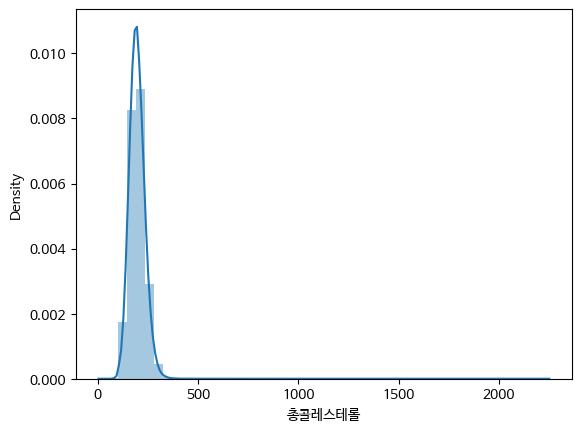

In [92]:
sns.distplot(df_chol)

<ipython-input-93-cc58c07489e4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[


<Axes: xlabel='총콜레스테롤', ylabel='Density'>

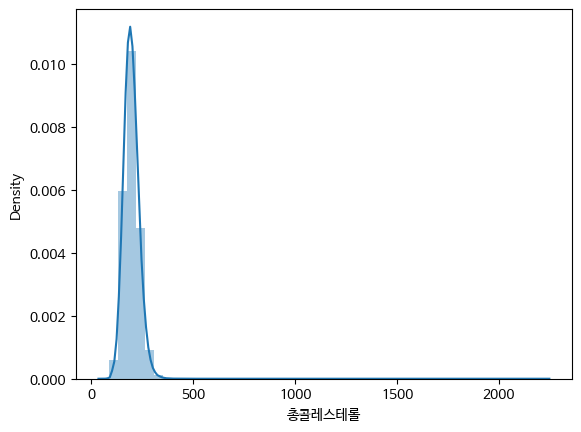

In [93]:
sns.distplot(df.loc[
    df['총콜레스테롤'].notnull() & (df['음주여부']==1),
    '총콜레스테롤'])

<Axes: xlabel='총콜레스테롤', ylabel='Density'>

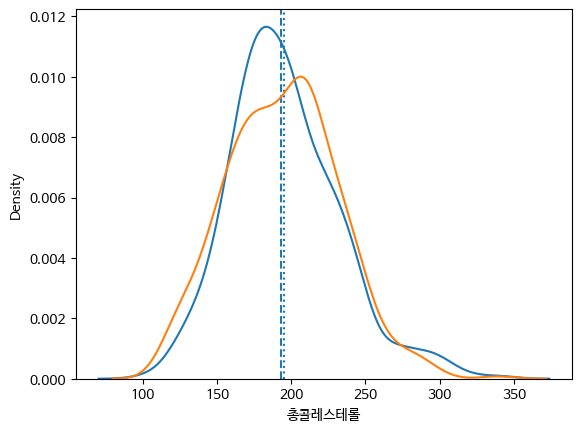

In [94]:
plt.axvline(df_sample['총콜레스테롤'].mean(),linestyle=":") # 그래프에 세로선 그리는 함수
plt.axvline(df_sample['총콜레스테롤'].median(),linestyle='--')

sns.kdeplot(df_sample.loc[
    df_sample['총콜레스테롤'].notnull() & (df['음주여부']==1),
    '총콜레스테롤'],label='음주 중')
sns.kdeplot(df_sample.loc[
    df_sample['총콜레스테롤'].notnull() & (df['음주여부']==0),
    '총콜레스테롤'],label='음주 안 함')

<Axes: xlabel='감마지티피', ylabel='Density'>

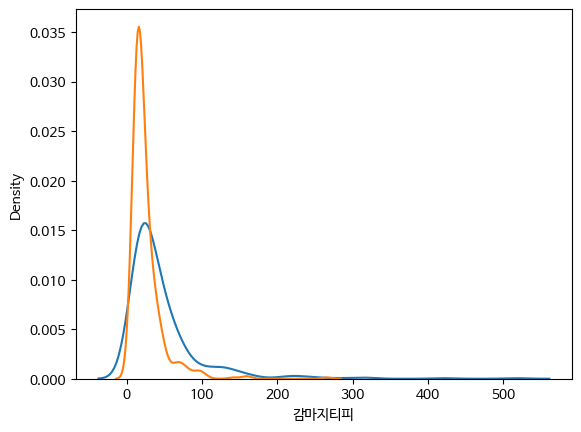

In [98]:
s_1=df_sample.loc[df_sample['음주여부']==1,'감마지티피']
s_0=df_sample.loc[df_sample['음주여부']==0,'감마지티피']

sns.kdeplot(s_1,label='음주 중')
sns.kdeplot(s_0,label='음주 안 함')

# 상관 분석

In [99]:
columns = ['연령대코드(5세단위)','체중(5Kg 단위)','신장(5Cm단위)','허리둘레',
           '시력(좌)','시력(우)','청력(좌)','청력(우)',
           '수축기혈압','이완기혈압','식전혈당(공복혈당)',
           '총콜레스테롤','트리글리세라이드','HDL콜레스테롤','LDL콜레스테롤','혈색소','요단백',
           '혈청크레아티닌','(혈청지오티)AST','(혈청지오티)ALT','감마지티피','흡연상태','음주여부']
columns

['연령대코드(5세단위)',
 '체중(5Kg 단위)',
 '신장(5Cm단위)',
 '허리둘레',
 '시력(좌)',
 '시력(우)',
 '청력(좌)',
 '청력(우)',
 '수축기혈압',
 '이완기혈압',
 '식전혈당(공복혈당)',
 '총콜레스테롤',
 '트리글리세라이드',
 'HDL콜레스테롤',
 'LDL콜레스테롤',
 '혈색소',
 '요단백',
 '혈청크레아티닌',
 '(혈청지오티)AST',
 '(혈청지오티)ALT',
 '감마지티피',
 '흡연상태',
 '음주여부']

In [100]:
df_small=df_sample[columns]
df_corr=df_small.corr()
df_corr

,연령대코드(5세단위),체중(5Kg 단위),신장(5Cm단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,...,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부
연령대코드(5세단위),1.000000,-0.210610,-0.397412,0.134720,-0.201947,-0.203802,0.193769,0.253585,0.296807,0.149758,...,-0.121635,0.023206,-0.165788,-0.022885,0.020587,0.106376,-0.014101,0.052946,-0.136350,-0.277149
체중(5Kg 단위),-0.210610,1.000000,0.648489,0.790520,0.076534,0.133502,-0.038100,-0.070590,0.244673,0.287084,...,-0.357603,0.106049,0.508366,0.028840,0.190769,0.196722,0.372930,0.254150,0.397230,0.235974
신장(5Cm단위),-0.397412,0.648489,1.000000,0.293774,0.141800,0.156605,-0.100178,-0.121083,0.030012,0.118103,...,-0.152505,-0.003485,0.529475,0.014089,0.243101,0.035321,0.187945,0.171372,0.505945,0.362905
허리둘레,0.134720,0.790520,0.293774,1.000000,-0.033007,0.034518,0.048379,0.052245,0.333025,0.302398,...,-0.409940,0.098301,0.377023,-0.002252,0.149351,0.229202,0.357288,0.271566,0.268685,0.084514
시력(좌),-0.201947,0.076534,0.141800,-0.033007,1.000000,0.462877,-0.049368,-0.084603,-0.010112,-0.001695,...,0.021295,-0.015221,0.073866,0.010995,0.018104,0.003379,0.029429,0.011519,0.063964,0.073696
시력(우),-0.203802,0.133502,0.156605,0.034518,0.462877,1.000000,-0.041439,-0.096255,-0.020638,0.012802,...,-0.030666,0.044949,0.056753,0.009548,0.031835,0.024706,0.083163,0.045560,0.054681,0.063220
청력(좌),0.193769,-0.038100,-0.100178,0.048379,-0.049368,-0.041439,1.000000,0.512849,0.105602,0.034535,...,-0.015340,-0.018551,-0.015990,-0.026771,-0.026352,0.014587,0.003031,-0.006351,-0.034204,-0.037669
청력(우),0.253585,-0.070590,-0.121083,0.052245,-0.084603,-0.096255,0.512849,1.000000,0.127883,0.041907,...,-0.078820,-0.059298,-0.031084,-0.013656,-0.030057,0.002233,-0.023672,0.005842,-0.040937,-0.032475
수축기혈압,0.296807,0.244673,0.030012,0.333025,-0.010112,-0.020638,0.105602,0.127883,1.000000,0.744132,...,-0.138843,0.003982,0.143038,0.016896,0.090268,0.143089,0.118240,0.176208,0.108511,0.032543
이완기혈압,0.149758,0.287084,0.118103,0.302398,-0.001695,0.012802,0.034535,0.041907,0.744132,1.000000,...,-0.090783,0.045014,0.219912,0.021567,0.131162,0.159043,0.154490,0.204673,0.144251,0.110143


In [101]:
df_corr.loc[df_corr['신장(5Cm단위)']>0.1,'신장(5Cm단위)']

,신장(5Cm단위)
체중(5Kg 단위),0.648489
신장(5Cm단위),1.000000
허리둘레,0.293774
시력(좌),0.141800
시력(우),0.156605
이완기혈압,0.118103
트리글리세라이드,0.113687
혈색소,0.529475
혈청크레아티닌,0.243101
(혈청지오티)ALT,0.187945


In [102]:
df_corr.loc[df_corr['음주여부']>0.25,'음주여부']

,음주여부
신장(5Cm단위),0.362905
혈색소,0.291863
감마지티피,0.250011
흡연상태,0.365642
음주여부,1.000000


In [103]:
df_corr['혈색소'].sort_values(ascending=False).head(7)

,혈색소
혈색소,1.000000
신장(5Cm단위),0.529475
체중(5Kg 단위),0.508366
흡연상태,0.460010
허리둘레,0.377023
(혈청지오티)ALT,0.294575
음주여부,0.291863


In [104]:
df_corr['감마지티피'].sort_values(ascending=False).head(7)

,감마지티피
감마지티피,1.000000
(혈청지오티)AST,0.525509
(혈청지오티)ALT,0.514197
트리글리세라이드,0.335514
흡연상태,0.305811
식전혈당(공복혈당),0.292087
허리둘레,0.271566


# Heatmap

<Axes: >

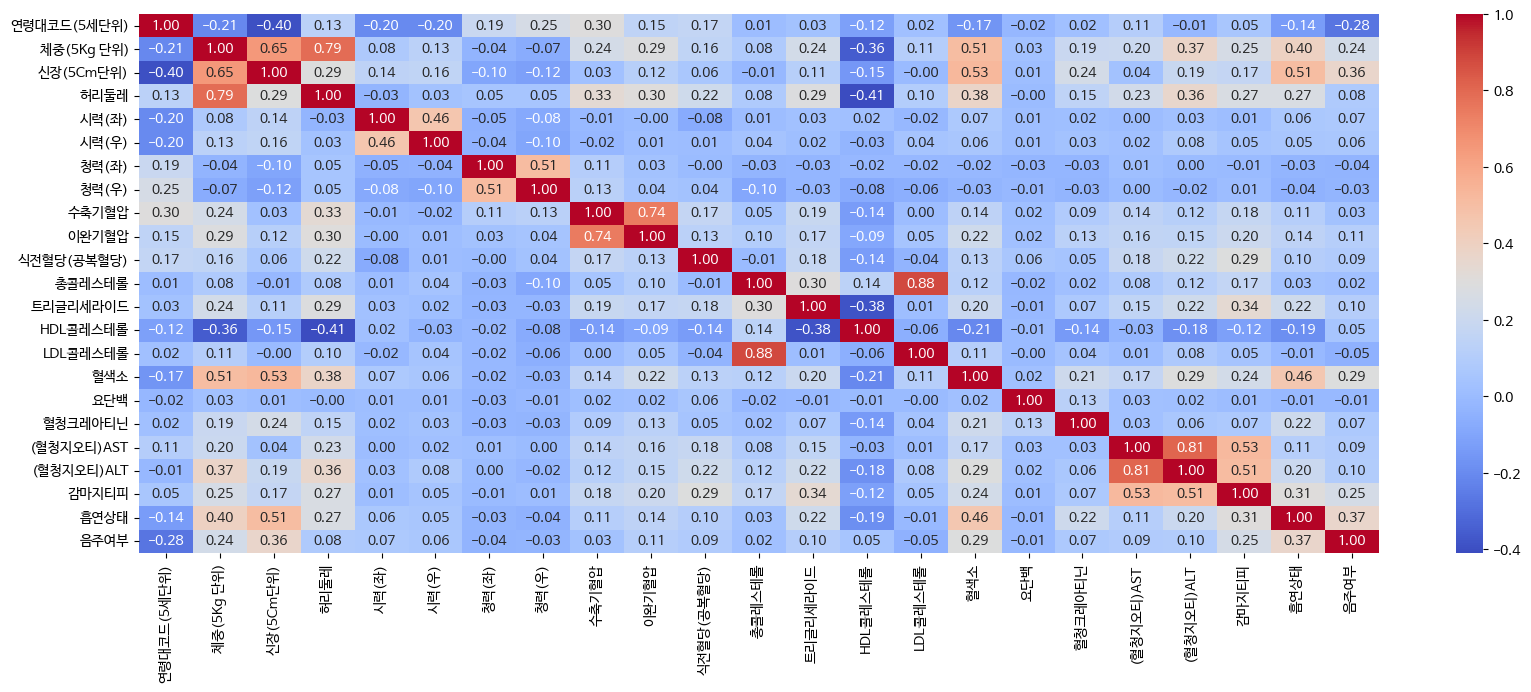

In [105]:
plt.figure(figsize=(20,7))
sns.heatmap(df_corr,annot=True,fmt='.2f',cmap='coolwarm')

<Axes: >

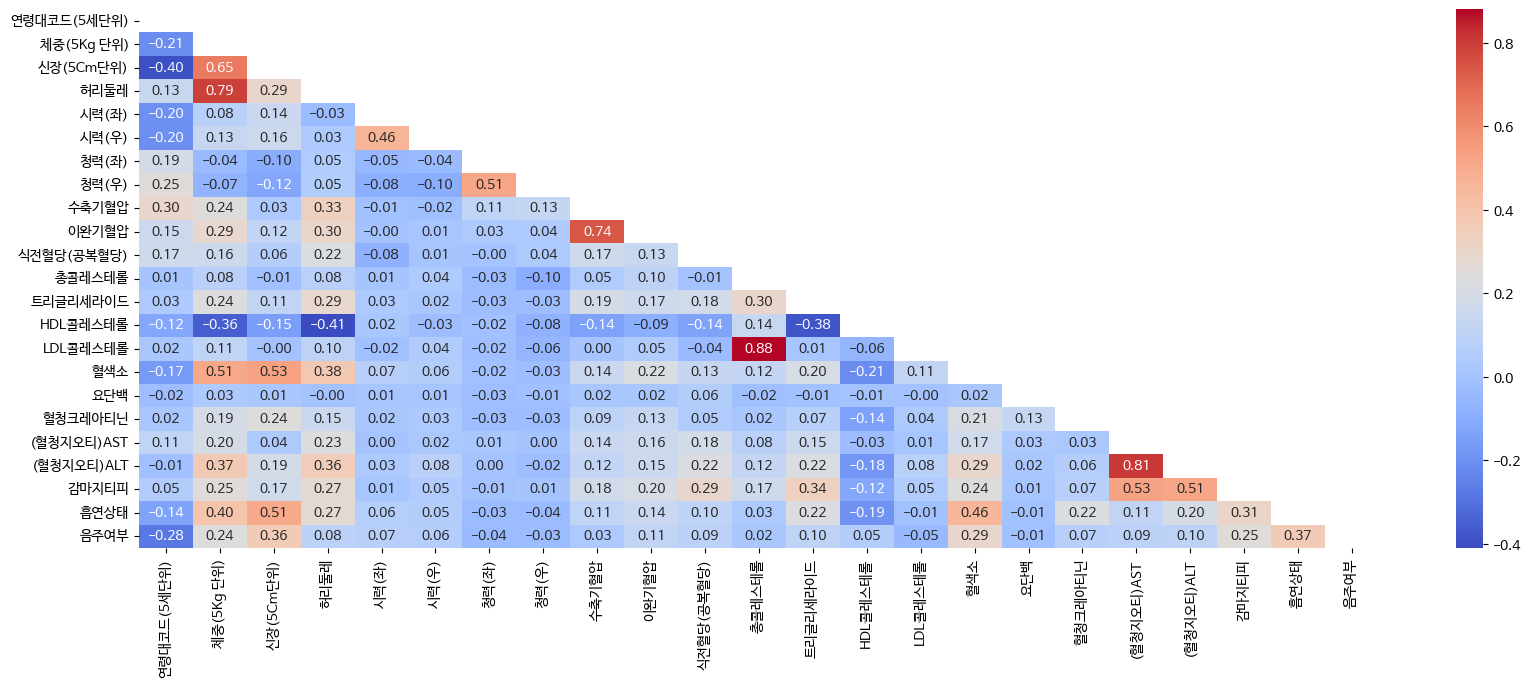

In [107]:
mask=np.triu(np.ones_like(df_corr,dtype=bool))

plt.figure(figsize=(20,7))
sns.heatmap(df_corr,annot=True,fmt='.2f',cmap='coolwarm',mask=mask)